<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#ML-baseline" data-toc-modified-id="ML-baseline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML baseline</a></span></li><li><span><a href="#Find-confidence-regions" data-toc-modified-id="Find-confidence-regions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find confidence regions</a></span></li><li><span><a href="#Get-synthetic-samples" data-toc-modified-id="Get-synthetic-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get synthetic samples</a></span></li><li><span><a href="#ML" data-toc-modified-id="ML-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ML</a></span><ul class="toc-item"><li><span><a href="#Original" data-toc-modified-id="Original-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Original</a></span></li><li><span><a href="#Original-+-all-synthetic" data-toc-modified-id="Original-+-all-synthetic-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Original + all synthetic</a></span></li><li><span><a href="#Original-+-synthetic-per-class" data-toc-modified-id="Original-+-synthetic-per-class-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Original + synthetic per class</a></span></li><li><span><a href="#Only-synthetic" data-toc-modified-id="Only-synthetic-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Only synthetic</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import seaborn as sns

import sys
sys.path.append('../helpers')
from main_loop import setup_experiment, run_experiment

2023-11-07 13:15:53.823468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Constants

In [3]:
epsilon = 0.9

constants_dict = {
    "GRIDSTEP": 0.05,
    "K": 3
}

target_data_dict = {
    "data_name": "Toy",
    "classes": [0, 1],
    "dims": 2,
    "dim_reduction": "12",
    "other": {
            "samples": 10000,
            "weights": [0.9, 0.1],
            "sep": 0.8
        }
}
target_data_dict["n_class"] = len(target_data_dict["classes"])

## Set up the experiment

In [5]:
setup_dict = setup_experiment(constants_dict, target_data_dict, nr_train_samples=50, calib_size=0.5)
setup_dict.keys()

Data loaded: ./../pickles/Synth2D-2labels-2dims-12-s10000-w0.9:0.1-s0.8.pickle
sample dims: (7000, 2) | (3000, 2)
label dims: (7000,) | (3000,)
train labels: [0 1]
test labels: [0 1]
Start preparing grid: (7000, 2)
180
1
Done preparing grid: (36000, 2)

Train samples: (50, 2)
{0: 0.9, 1: 0.1}
Test samples: (3000, 2)
{0: 0.9, 1: 0.1}
Prop: (25, 2) (25,) 
Calib: (25, 2) (25,)
X_prop: (25, 2)
{0: 0.88, 1: 0.12}
X_calib: (25, 2)
{1: 0.08, 0: 0.92}
[0, 1]


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(25,)


NCMs for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(36000,)


p-values for labels:   0%|          | 0/2 [00:00<?, ?it/s]

[0, 1]
(36000,)


dict_keys(['grid_arrays', 'grid_points', 'ps_grid', 'X_train', 'y_train', 'X_test', 'y_test', 'X_prop', 'y_prop', 'X_calib', 'y_calib'])

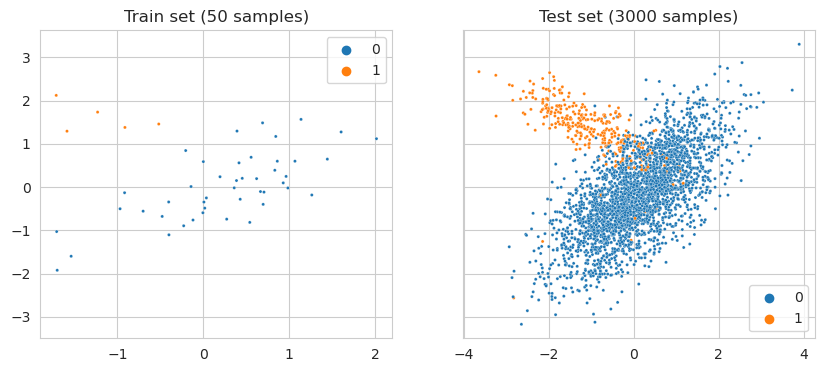

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.scatterplot(x=setup_dict['X_train'][:, 0], y=setup_dict['X_train'][:, 1], hue=setup_dict['y_train'], palette="tab10", s=5, ax=axs[0])
axs[0].set_title("Train set ({} samples)".format(len(setup_dict['y_train'])))
sns.scatterplot(x=setup_dict['X_test'][:, 0], y=setup_dict['X_test'][:, 1], hue=setup_dict['y_test'], palette="tab10", s=5, ax=axs[1])
axs[1].set_title("Test set ({} samples)".format(len(setup_dict['y_test'])))

plt.legend()
plt.show()

# Run the experiment

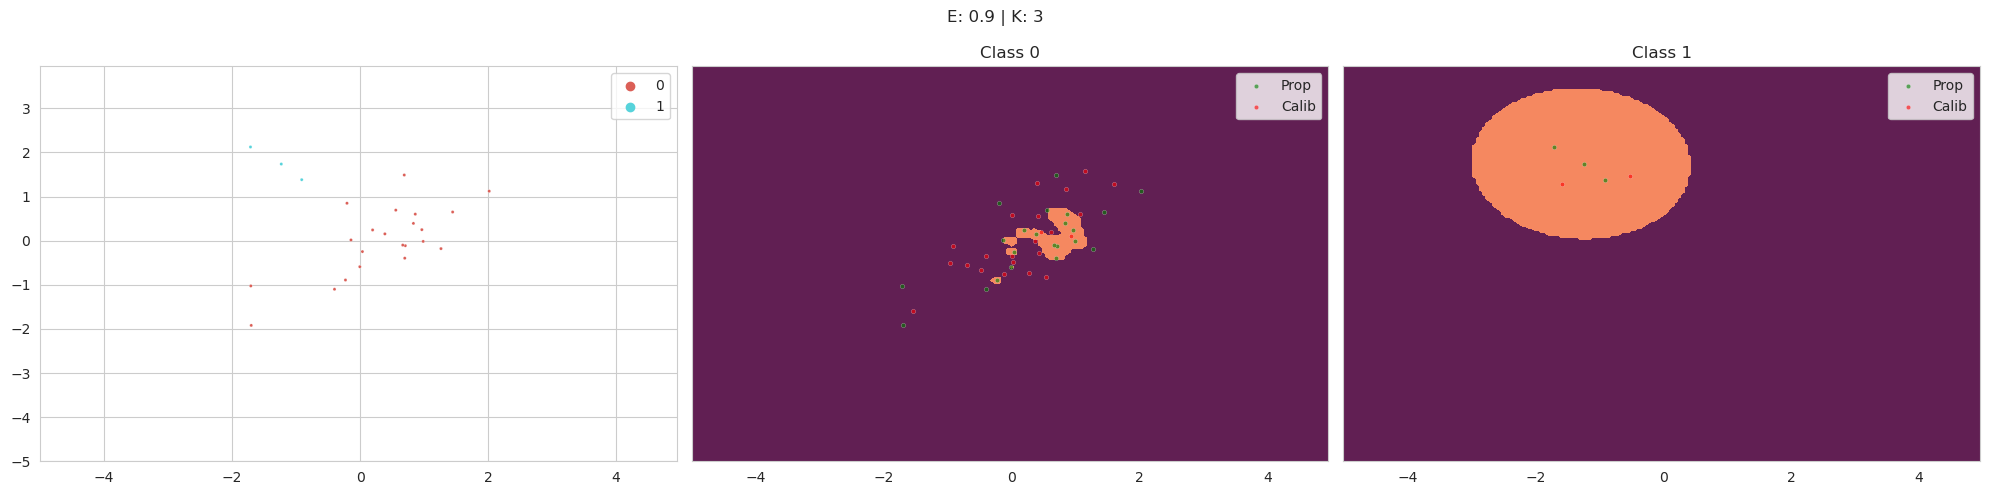

Synthetic samples per class
Label 0: (278, 2)
Label 1: (3629, 2)
(278,)
(3907,)


Baseline results: ORIGINAL


2023-11-07 13:16:08.599742: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


94/94 [==============================] - 0s 3ms/step


/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jules/anaconda3/envs/cp-synthesis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2686
           1       0.00      0.00      0.00       314

    accuracy                           0.90      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.80      0.90      0.85      3000



Total synthetic samples: (3907, 2)
Total O+S samples: (3957, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2686
           1       0.44      0.91      0.59       314

    accuracy                           0.87      3000
   macro avg       0.71      0.89      0.75      3000
weighted avg       0.93      0.87      0.89      3000



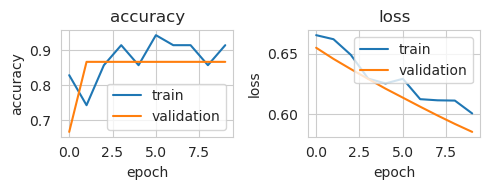

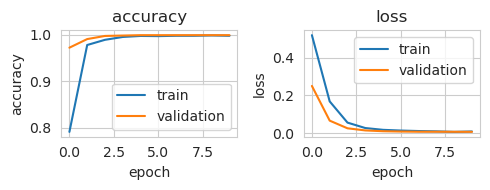

In [7]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=1)

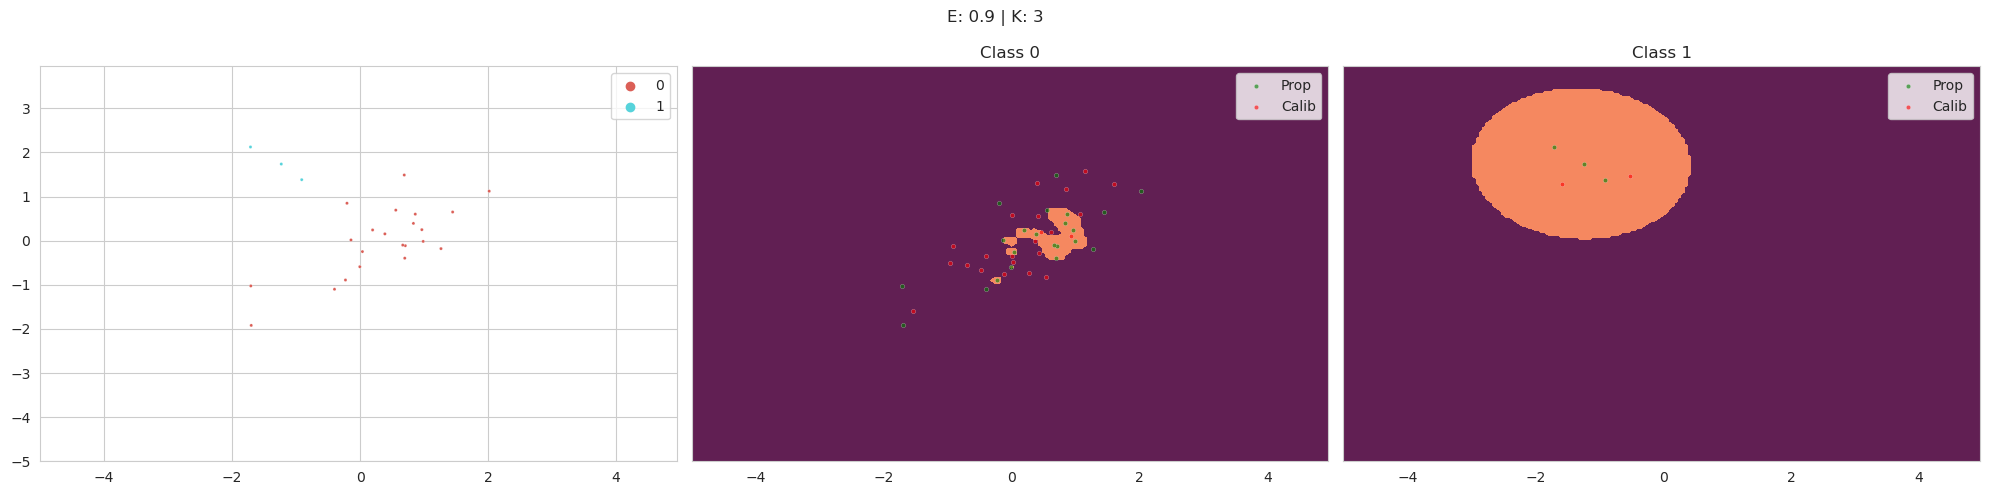

Synthetic samples per class
Label 0: (278, 2)
Label 1: (3629, 2)
(278,)
(3907,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2686
           1       0.00      0.00      0.00       314

    accuracy                           0.84      3000
   macro avg       0.44      0.47      0.46      3000
weighted avg       0.80      0.84      0.82      3000



Total synthetic samples: (3907, 2)
Total O+S samples: (3957, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      0.81      0.89      2686
           1       0.36      0.91      0.52       314

    accuracy                           0.82      3000
   macro avg       0.68      0.86      0.71      3000
weighted avg       0.92      0.82      0.85      3000



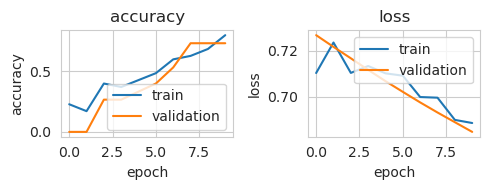

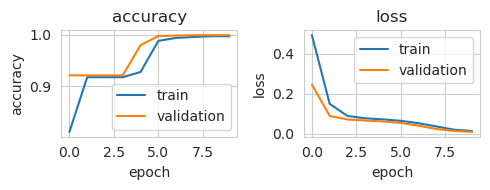

In [8]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=12)

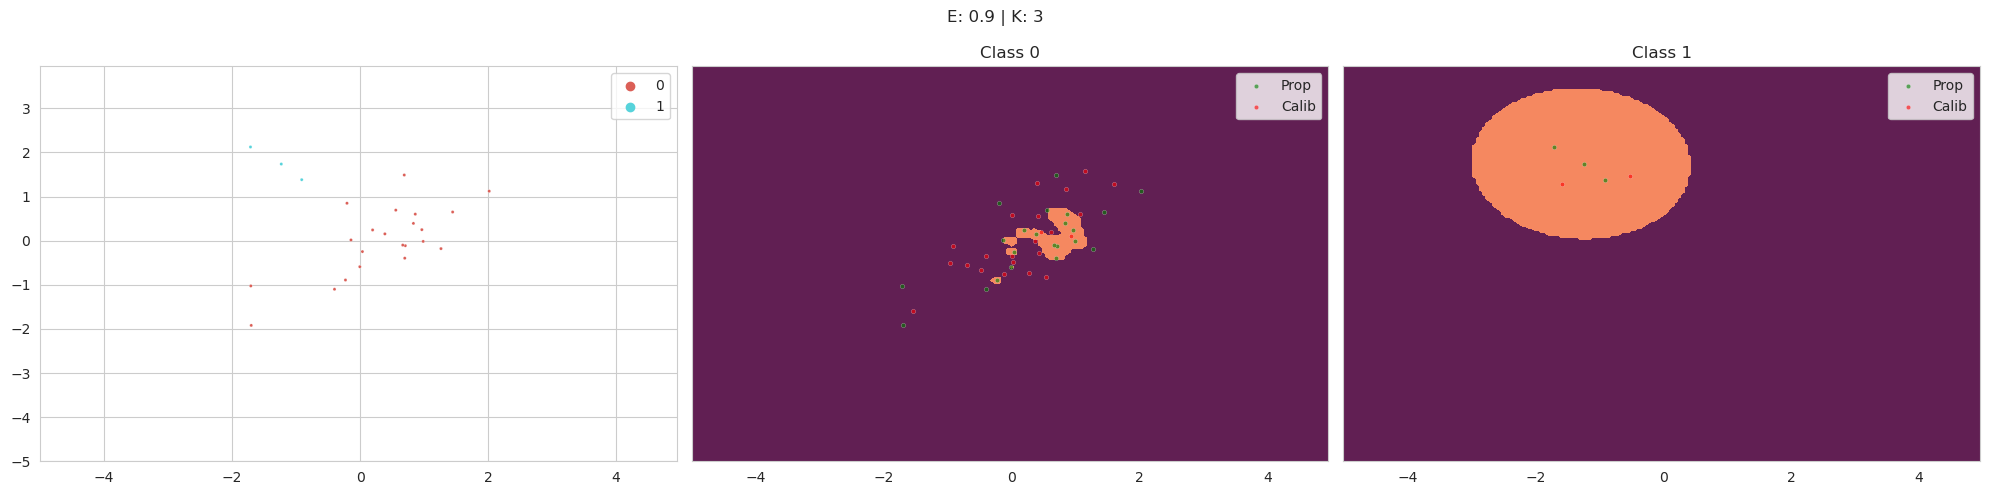

Synthetic samples per class
Label 0: (278, 2)
Label 1: (3629, 2)
(278,)
(3907,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.33      0.49      2686
           1       0.15      0.99      0.26       314

    accuracy                           0.40      3000
   macro avg       0.57      0.66      0.38      3000
weighted avg       0.91      0.40      0.47      3000



Total synthetic samples: (3907, 2)
Total O+S samples: (3957, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2686
           1       0.46      0.91      0.61       314

    accuracy                           0.88      3000
   macro avg       0.72      0.89      0.77      3000
weighted avg       0.93      0.88      0.90      3000



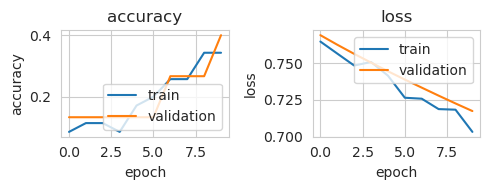

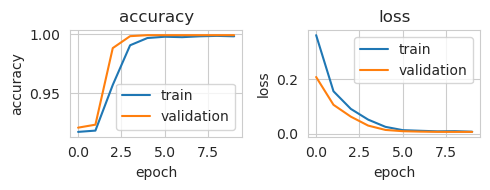

In [9]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=42)

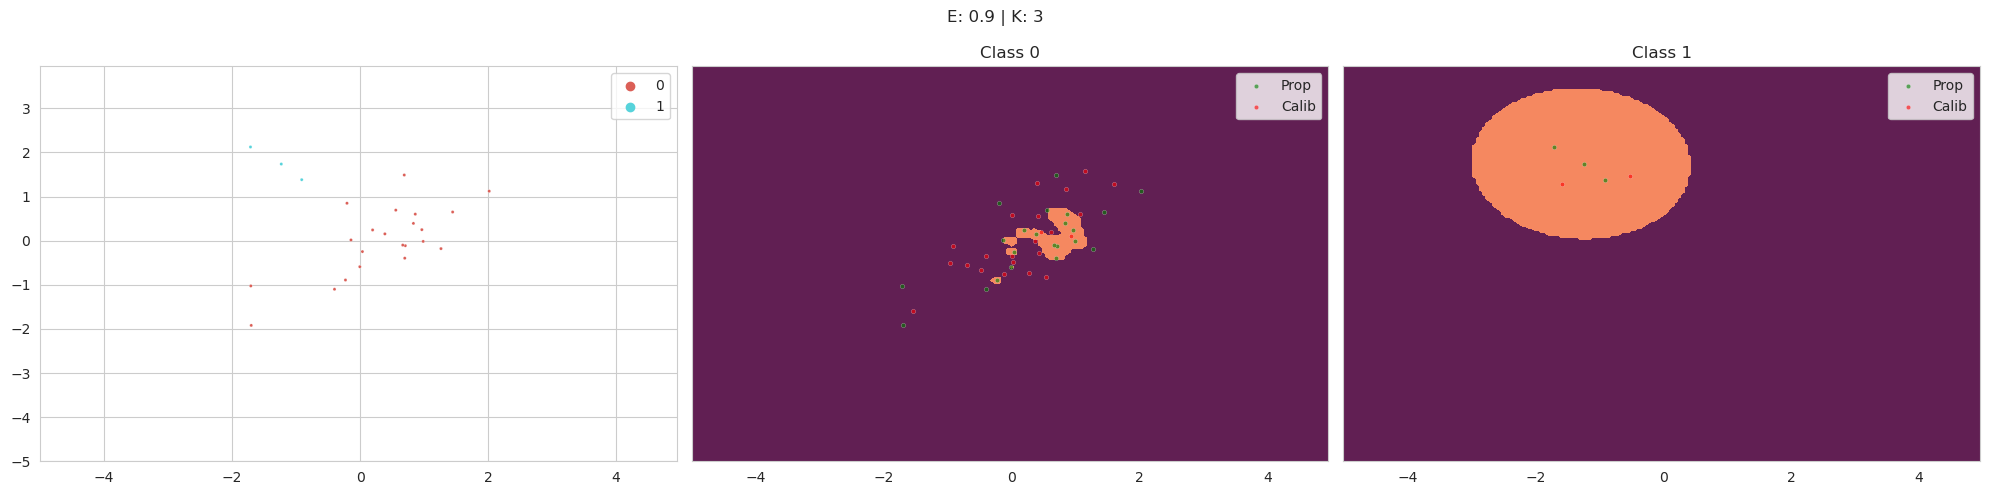

Synthetic samples per class
Label 0: (278, 2)
Label 1: (3629, 2)
(278,)
(3907,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.56      0.71      2686
           1       0.19      0.89      0.31       314

    accuracy                           0.59      3000
   macro avg       0.58      0.72      0.51      3000
weighted avg       0.90      0.59      0.67      3000



Total synthetic samples: (3907, 2)
Total O+S samples: (3957, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2686
           1       0.44      0.91      0.59       314

    accuracy                           0.87      3000
   macro avg       0.71      0.89      0.76      3000
weighted avg       0.93      0.87      0.89      3000



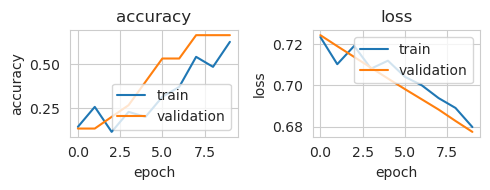

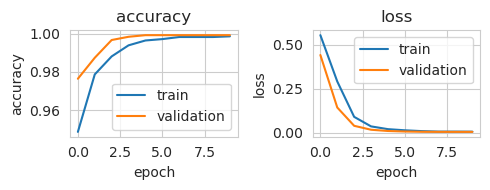

In [10]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=50)

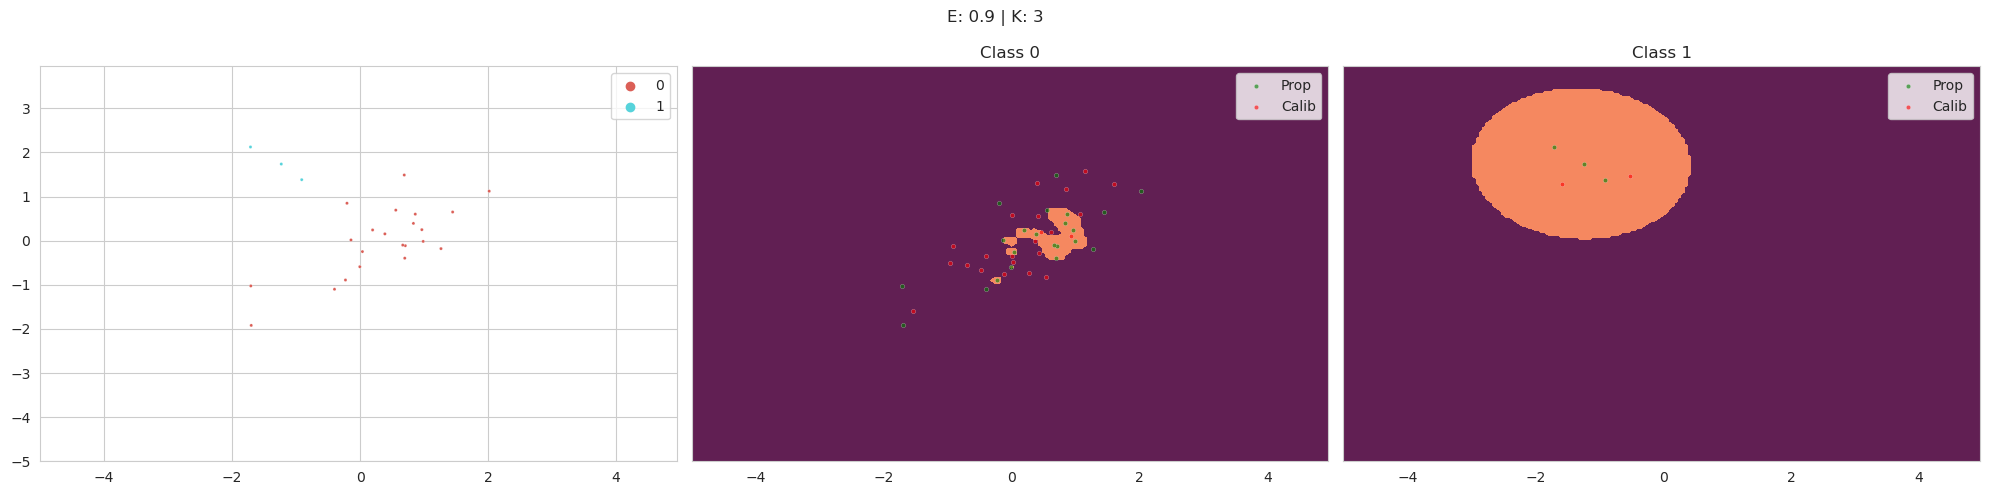

Synthetic samples per class
Label 0: (278, 2)
Label 1: (3629, 2)
(278,)
(3907,)


Baseline results: ORIGINAL
94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2686
           1       0.99      0.37      0.54       314

    accuracy                           0.93      3000
   macro avg       0.96      0.68      0.75      3000
weighted avg       0.94      0.93      0.92      3000



Total synthetic samples: (3907, 2)
Total O+S samples: (3957, 2)
ORIGINAL + SYNTHETIC
94/94 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2686
           1       0.39      0.92      0.54       314

    accuracy                           0.84      3000
   macro avg       0.69      0.87      0.72      3000
weighted avg       0.93      0.84      0.86      3000



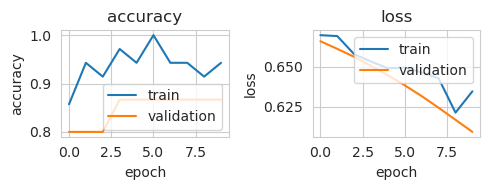

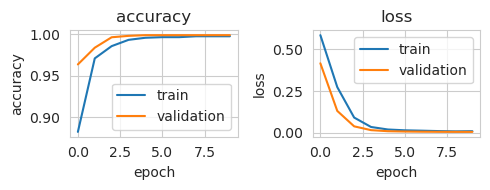

In [11]:
run_experiment(epsilon, constants_dict, setup_dict, is_original=True, is_o_s=True, \
               per_class=[], is_synthetic=False, tf_seed=100)